## <ins>DataViz GameSpy</ins>

### Notre jeu de données

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
MoisLib = ['Jan','Fev','Mar','Avr','Mai','Juin','Juil','Août','Sept','Oct','Nov','Déc']

#Dataset Final avec le scraping
df = pd.read_csv('../data/02_GameSpy_Scrapping_MergeAllDataSet.csv',sep=',',index_col='Unnamed: 0')

#Dataset initial
df_init= pd.read_csv('../data/vgsales.csv',sep=',')

#### Introduction 
Une analyse préliminaire de notre jeu de données nous montre que :
- La distribution est assez homogène au niveau des labels Score, Rate et Reviews
- La majeure partie des jeux-vidéos sont sorties dans l'intervalle de 2003 à 2010
- Au niveau des ventes nous avons pas mal de valeurs hyper fortes

Dans la suite de notre analyse, nous évoquerons les **15 hypothèses suivantes** :
- L'arrivée de certaines consoles de jeux-vidéos a influé significativement sur les ventes de jeux
- Le mois de sortie du jeu influe sur l'évolution des ventes
- La répartition des ventes par région évolue au fur et à mesure des décennies
- Le genre des jeux les plus vendus n’est pas le même en fonction des régions du monde
- Les plateformes qui font le plus de ventes sont celles pour lesquelles il y a le plus de jeux
- Les genres qui font le plus de ventes sont ceux pour lesquels il y a le plus de jeux
- Certains genres sont mieux notés que d'autres
- Certaines variables sont corrélées entre elles et surtout au niveau de ventes
- Les jeux les mieux notés sont les plus vendus
- Les jeux qui font partie d’une licence sont les plus vendus
- Les jeux qui comptabilisent le plus de ventes ont été lancés par les meilleurs studios
- Les éditeurs qui font le plus de ventes produisent le plus de jeux
- Les éditeurs avec le plus de ventes sont ceux dont les jeux ont les meilleurs notes moyennes
- Les studios qui font le plus de ventes lancent le plus de jeux
- Les studios avec le plus de ventes sont ceux dont les jeux ont les meilleurs notes moyennes


### 1- L'arrivée de certaines consoles de jeux-vidéos a influé significativement sur les ventes de jeux

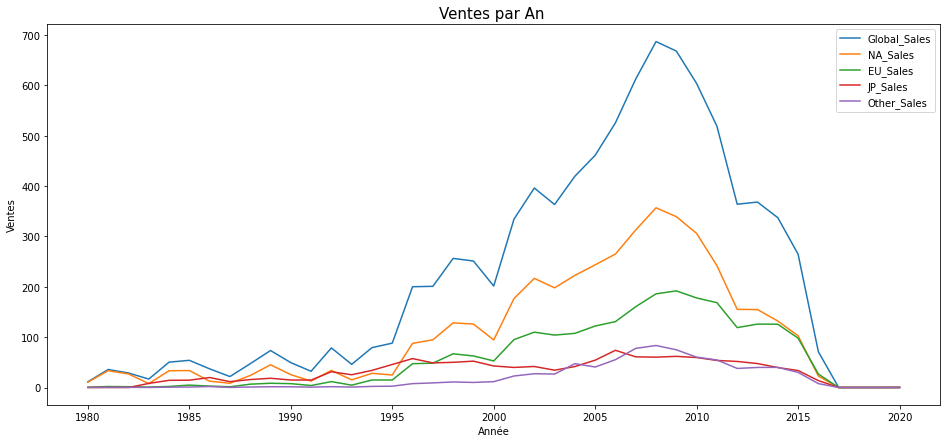

In [4]:
#Créer un dataset des ventes agrégées par Année
sales_year = df.groupby(['Year']).sum()
sales_year = sales_year.reset_index()
sales_year = sales_year[['Year','Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
sales_year.Year = sales_year.Year.astype('int')


ax = sns.lineplot(x="Year",y="Global_Sales", data=sales_year,label="Global_Sales")
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.title('Ventes Globales par An')

fig = plt.gcf()
fig.set_size_inches(16, 7)

ax = sns.lineplot(x="Year",y="NA_Sales", data=sales_year,label="NA_Sales")


fig = plt.gcf()
fig.set_size_inches(16, 7)

ax = sns.lineplot(x="Year",y="EU_Sales", data=sales_year,label="EU_Sales")
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.title('Ventes par An ',fontsize=15)

fig = plt.gcf()
fig.set_size_inches(16, 7)

ax = sns.lineplot(x="Year",y="JP_Sales", data=sales_year,label="JP_Sales")

fig = plt.gcf()
fig.set_size_inches(16, 7)

ax = sns.lineplot(x="Year",y="Other_Sales", data=sales_year,label="Other_Sales")
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.title('Ventes par An ',fontsize=15)

fig = plt.gcf()
fig.set_size_inches(16, 7)


plt.legend();

### <ins>Commentaires</ins>:
Nous remarquons que les ventes de jeux vidéo semblent faire un bon significatif
à partir des années **1995** pour retomber vers 0 après **2017**.
Celà pourrait s'expliquer par le fait que certaines plateformes ont cessées de fonctionner pendant cette période et que d'autres consoles 
plus performantes ont fait leur entrée sur le marché.comme nous pouvons le voir sur les images ci-dessous provenant de Wikipédia.
Ensuite, les ventes d'**Amérique du nord** semblent influer beaucoup sur les ventes globales.

<img src="../images/consoles_europe.png"
     alt="Console Europe"
     style="float: left; margin-right: 10px;" />
<img src="../images/console_amerique_du_nord.png"
     alt="Console Amérique du nord"
     style="float: left; margin-right: 10px;" />
<img src="../images/consoles_japon.png"
     alt="Console Japon"
     style="float: left; margin-right: 10px;" />
        

Nous voyons d'ailleurs l'impact de la sortie de la console Wii pour le studio Nitendo dans les années 2000 sur l'essort de ses ventes

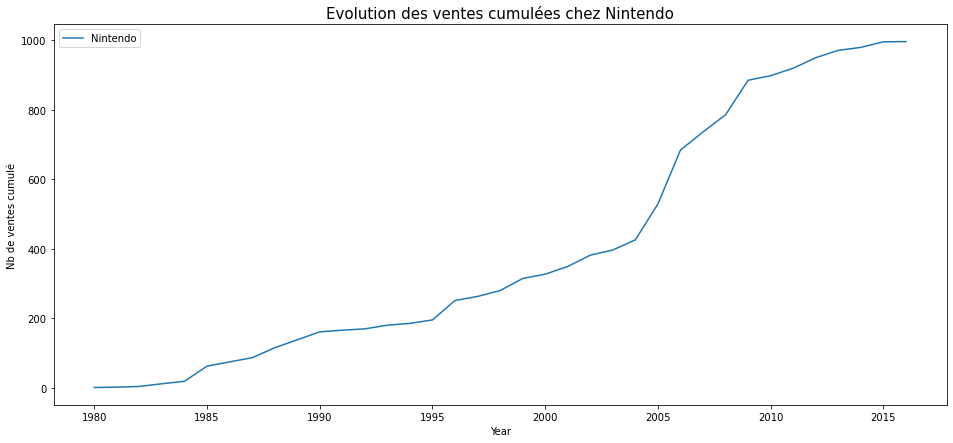

In [5]:
#Création du dataset des ventes du studio Nintendo ordonné par date de sortie du jeu
df_nintendo = df[df['Studio'].str.contains('Nintendo', na=False)].sort_values(by=['DateSortie'])
df_nintendo = df_nintendo.groupby('Year').agg({'Global_Sales': 'sum'}).reset_index().sort_values(by='Year')
df_nintendo['GS_cum'] = df_nintendo['Global_Sales'].cumsum()

#Visualisation de ces ventes
fig, ax = plt.subplots()
fig.set_size_inches(16, 7)

df_nintendo.plot(x='Year', y='GS_cum', label='Nintendo', ax=ax)

plt.ylabel('Nb de ventes cumulé')
plt.legend()
plt.title("Evolution des ventes cumulées chez Nintendo", fontsize=15);

### 2- Le Mois de sortie du jeu influe sur l'évolution des ventes

In [6]:
# Déduire le Mois de sortie du jeu
def __dateMonth(date):
    if len(date) > 3:
        month = date.split('-')[1]
    else:
        month = date
    return month
df['MoisSortie'] = df['DateSortie'].astype('str').apply(lambda x:__dateMonth(x))

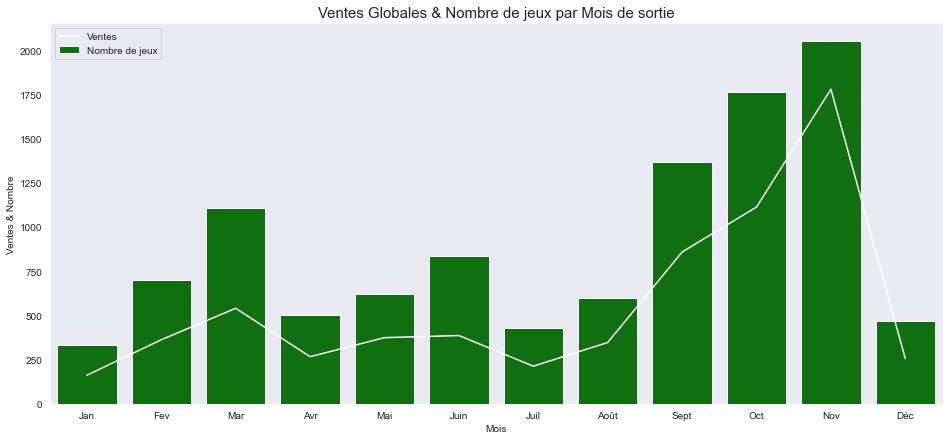

In [7]:
# Créer un dataset des ventes agrégées par Mois
sales_month_sum = df.groupby(['MoisSortie']).sum()
games_month_count = df.groupby(['MoisSortie']).count()


# Traitement pour la somme des ventes 
sales_month_sum = sales_month_sum.reset_index()
sales_month_sum = sales_month_sum[['MoisSortie','Global_Sales']]
sales_month_sum = sales_month_sum[sales_month_sum['MoisSortie']!='nan']

# Traitement pour le nombre de jeux
games_month_count = games_month_count.reset_index()
games_month_count = games_month_count[['MoisSortie','Name']]
games_month_count = games_month_count[games_month_count['MoisSortie']!='nan']


sns.set_style("dark")
sns.lineplot(x="MoisSortie",y="Global_Sales", data=sales_month_sum,color='white',label='Ventes')
sns.barplot(x="MoisSortie",y="Name", data=games_month_count,label="Nombre de jeux",color='green')


plt.xlabel('Mois')
plt.xticks(range(0, 12),MoisLib)
plt.ylabel('Ventes & Nombre')
plt.title('Ventes Globales & Nombre de jeux par Mois de sortie',fontsize=15)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(16, 7)
fig.savefig("../images/ventes_month.png", dpi = 300)

### <ins>Commentaires</ins>:
Nous constatons que les jeux sortis dans la période de Septembre à Novembre se vendent mieux. Cependant , n'y a -t-il des années sur lesquelles nous avons plus de ventes sur cette période qui pourraient fausser notre analyse ?

In [8]:
# Formatage de la date de sortie 
def __dateYear(date):
    if len(date) > 3:
        year = date.split('-')[0]
    else:
        year = date
    return year
df['AnneeSortie'] = df['DateSortie'].astype('str').apply(lambda x:__dateYear(x))

/var/folders/3s/rcnttmg11rn478_1q72ydsb4g71kqb/T/ipykernel_5139/1942628581.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(MoisLib)
/var/folders/3s/rcnttmg11rn478_1q72ydsb4g71kqb/T/ipykernel_5139/1942628581.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(MoisLib)


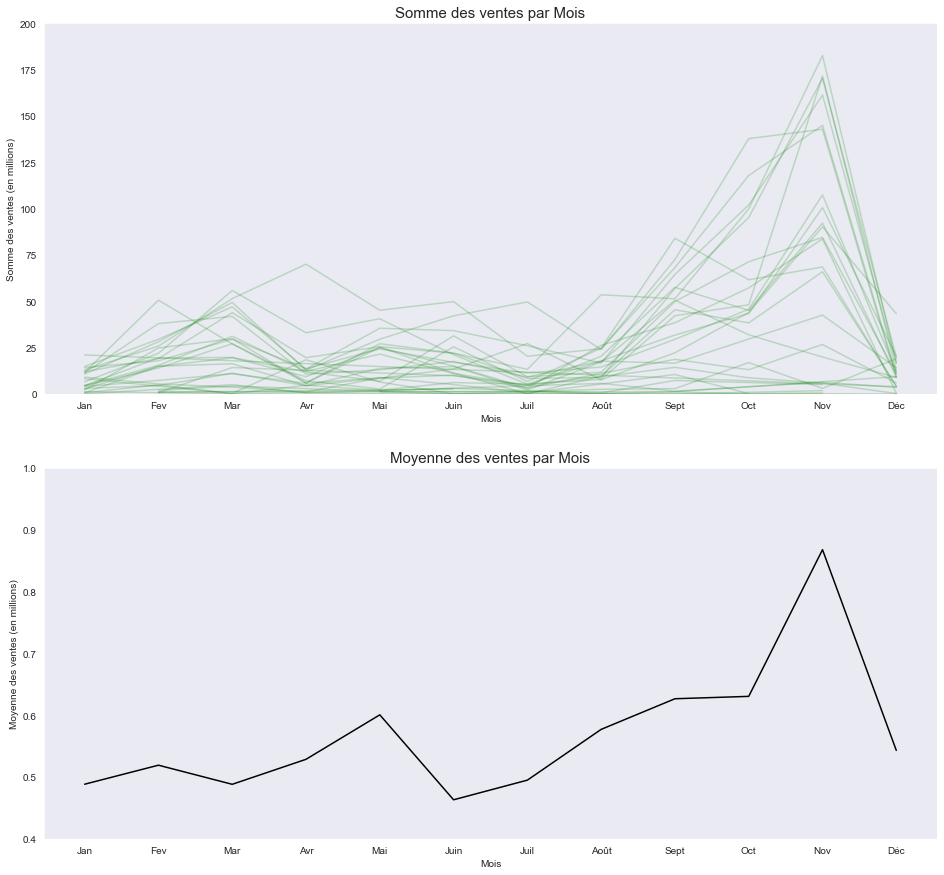

In [9]:
# Créer un dataset des ventes agrégées par Année et Mois
sales_year_sum = df.groupby(['AnneeSortie','MoisSortie']).sum()
sales_year_mean = df.groupby(['MoisSortie']).mean()


sales_year_sum = sales_year_sum.reset_index()
sales_year_sum = sales_year_sum[sales_year_sum['MoisSortie']!='nan']

sales_year_mean = sales_year_mean.reset_index()
sales_year_mean = sales_year_mean[sales_year_mean['MoisSortie']!='nan']

fig, ax = plt.subplots(2)


for year in df['AnneeSortie'].unique():
    sales_m_y = sales_year_sum[sales_year_sum['AnneeSortie']==year]
    mois = sales_m_y['MoisSortie']
    sales = sales_m_y['Global_Sales']
    # Ventes par Mois pour chaque année
    ax[0].plot(mois, sales, color = 'green', alpha = 0.2)
  
 
#Adapter l'axe des ordonnées pour la sommes des ventes 
ax[0].set_ylim([0,200])
ax[0].set_xlabel("Mois")
ax[0].set_ylabel("Somme des ventes (en millions)")
ax[0].set_xticklabels(MoisLib)
ax[0].set_title("Somme des ventes par Mois",fontsize=15)

#Adapter l'axe des ordonnées pour la moyenne des ventes
ax[1].plot(sales_year_mean['MoisSortie'],sales_year_mean['Global_Sales'],color='black')
ax[1].set_ylim([0.4,1])
ax[1].set_xlabel("Mois")
ax[1].set_ylabel("Moyenne des ventes (en millions)")
ax[1].set_xticklabels(MoisLib)
ax[1].set_title("Moyenne des ventes par Mois",fontsize=15)



fig = plt.gcf()
fig.set_size_inches(16, 15)
#fig.savefig("../data/images/ventes_month_year.png", dpi = 300)

### <ins>Commentaires</ins>:
Sur les ventes par Mois et par année, il se dessine deux tendances.
Les jeux-sortis dans la période de Septembre à Novembre semblent effectivement être  les plus vendus. 
Ils sont surement offerts comme cadeaux de fin d'année. Ce qui pourrait expliquer ce phénomène.
Cependant, il y a pas mal de ventes dans la période de Février à Avril

### 3- La répartition des ventes par région évolue au fur et à mesure des décennies

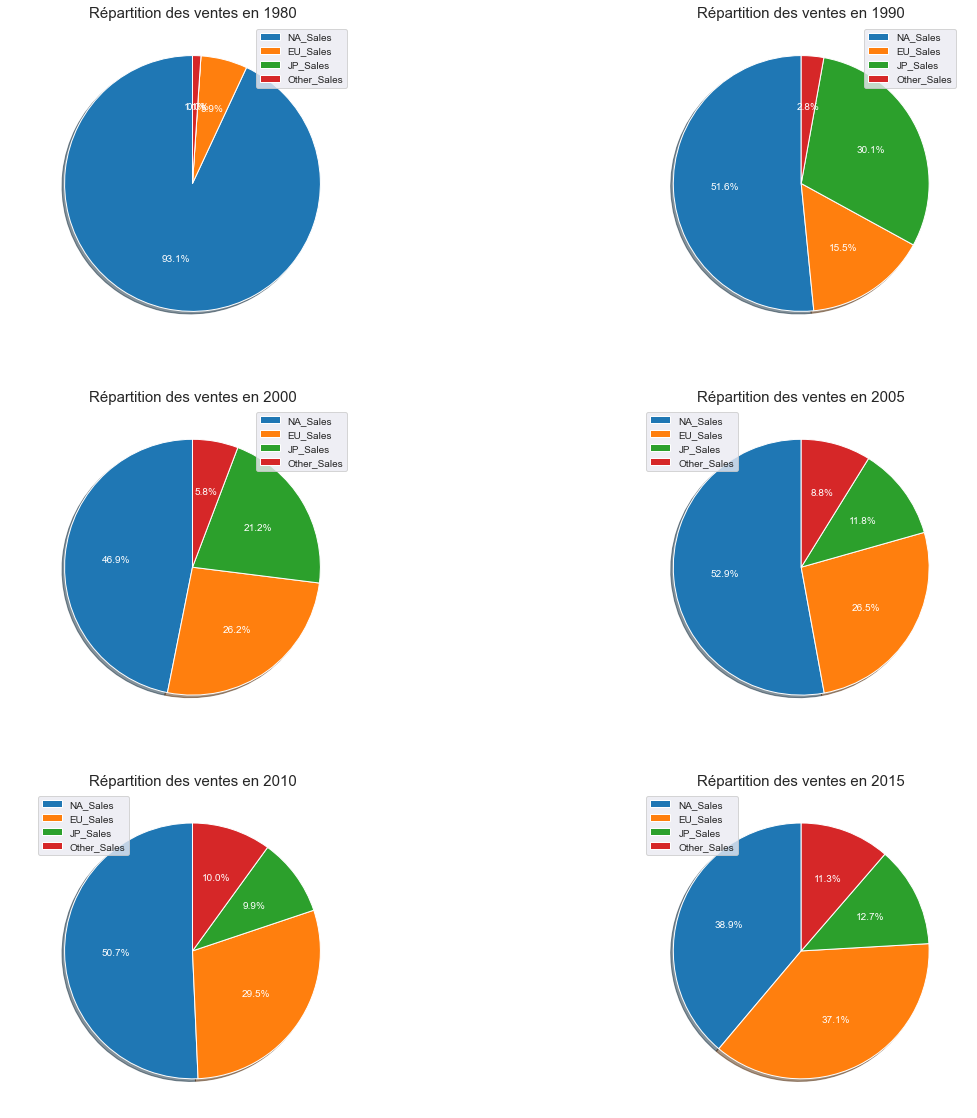

In [10]:
#Groupby pour regrouper les ventes des toutes les régions par année
repart_sales=df.groupby("Year").agg({"NA_Sales":sum,"EU_Sales":sum,"JP_Sales":sum,"Other_Sales":sum})
repart_sales=repart_sales[repart_sales.index.isin([1980,1990,2000,2005,2010,2015])]

#Création de camemberts présentant la répartition par pays sur plusieurs années
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.pie(repart_sales.loc[1980],labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],autopct='%1.1f%%',shadow=True,startangle=90,textprops=dict(color="w"))
plt.title("Répartition des ventes en 1980",fontsize=15)
plt.legend()

plt.subplot(3,2,2)
plt.pie(repart_sales.loc[1990],labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],autopct='%1.1f%%',shadow=True,startangle=90,textprops=dict(color="w"))
plt.title("Répartition des ventes en 1990",fontsize=15)
plt.legend()

plt.subplot(3,2,3)
plt.pie(repart_sales.loc[2000],labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],autopct='%1.1f%%',shadow=True,startangle=90,textprops=dict(color="w"))
plt.title("Répartition des ventes en 2000",fontsize=15)
plt.legend()

plt.subplot(3,2,4)
plt.pie(repart_sales.loc[2005],labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],autopct='%1.1f%%',shadow=True,startangle=90,textprops=dict(color="w"))
plt.title("Répartition des ventes en 2005",fontsize=15)
plt.legend()

plt.subplot(3,2,5)
plt.pie(repart_sales.loc[2010],labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],autopct='%1.1f%%',shadow=True,startangle=90,textprops=dict(color="w"))
plt.title("Répartition des ventes en 2010",fontsize=15)
plt.legend()

plt.subplot(3,2,6)
plt.pie(repart_sales.loc[2015],labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],autopct='%1.1f%%',shadow=True,startangle=90,textprops=dict(color="w"))
plt.title("Répartition des ventes en 2015",fontsize=15)
plt.legend();


### <ins>Commentaires</ins>:
Nous voyons bien ici que la région Amérique du Nord avait quasiment un monopole sur le marché du jeu vidéo en 1980 et qu'en 2015, sa part de marché est égale à celle de l'Europe, qui elle a évolué au fur et à mesure des années.
Le Japon a eu lui un essort dans les années 90 mais sa part de marché a eu tendance à diminuer depuis.
Enfin, petit à petit, nous voyons aussi les ventes d'autres régions émerger sur le marché

### 4- Le genre des jeux les plus vendus évolue aussi au fur et à mesure des années

/Users/jan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

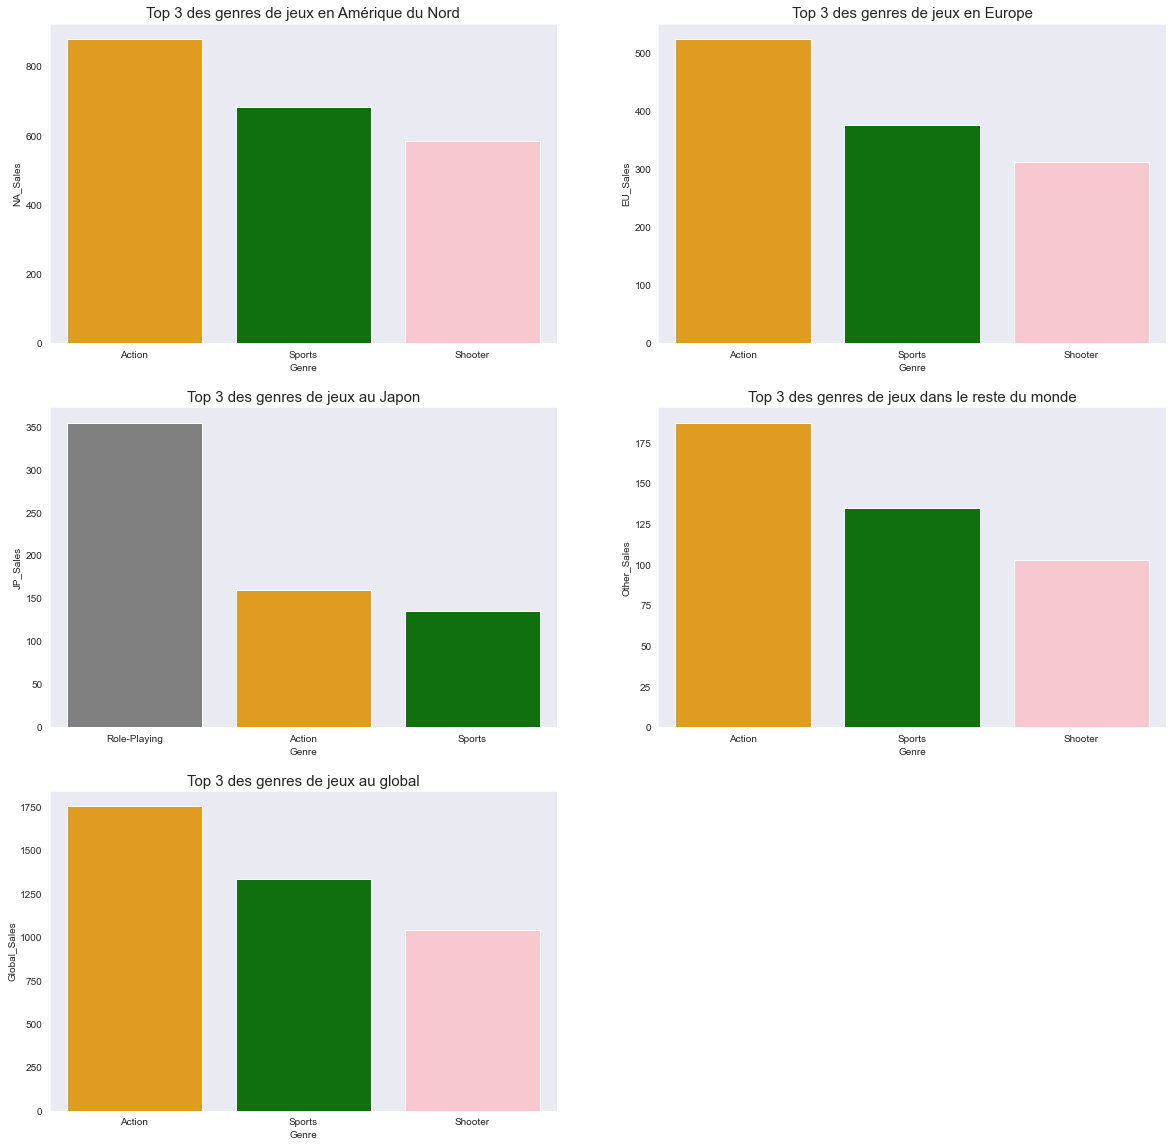

In [12]:
#Groupby pour obtenir un cumul des ventes des différentes régions par genre
sales_per_year=df.groupby("Genre").agg({"NA_Sales":sum,"EU_Sales":sum,"JP_Sales":sum,"Other_Sales":sum,"Global_Sales":sum}).sort_values(by="JP_Sales",ascending=False).reset_index().sort_values("Global_Sales",ascending=False)

#Création de graphiques en barres affichant le top 3 des genres par région
plt.figure(figsize=(20,20))

#Création d'une palette pour que les couleurs associées aux genres soient les mêmes d'une région à une autre
palette={}
for c in sales_per_year.Genre.unique():
    if c=='Action':
        palette[c]="orange"
    elif c=='Sports':
        palette[c]="green"
    elif c=='Shooter':
        palette[c]="pink"
    else:
        palette[c]="grey"
        
plt.subplot(3,2,1)
sns.barplot("Genre","NA_Sales",data=sales_per_year.sort_values("NA_Sales",ascending=False).head(3),palette=palette)
plt.title("Top 3 des genres de jeux en Amérique du Nord",fontsize=15);

plt.subplot(3,2,2)
sns.barplot("Genre","EU_Sales",data=sales_per_year.sort_values("EU_Sales",ascending=False).head(3),palette=palette)
plt.title("Top 3 des genres de jeux en Europe",fontsize=15)

plt.subplot(3,2,3)
sns.barplot("Genre","JP_Sales",data=sales_per_year.sort_values("JP_Sales",ascending=False).head(3),palette=palette)
plt.title("Top 3 des genres de jeux au Japon",fontsize=15)

plt.subplot(3,2,4)
sns.barplot("Genre","Other_Sales",data=sales_per_year.sort_values("Other_Sales",ascending=False).head(3),palette=palette)
plt.title("Top 3 des genres de jeux dans le reste du monde",fontsize=15)

plt.subplot(3,2,5)
sns.barplot("Genre","Global_Sales",data=sales_per_year.sort_values("Global_Sales",ascending=False).head(3),palette=palette)
plt.title("Top 3 des genres de jeux au global",fontsize=15);

Ajouter top 3 genre par région

### 5- Les plateformes qui font le plus de ventes sont celles pour lesquelle il y a le plus de jeux

In [4]:
#Fonction qui renvoie le nombre de valeurs unique d'une colonne d'une dataframe pandas
#Argument : colonne d'un dataframe
def uniques(serie):
    unique = serie.unique()
    return len(unique)

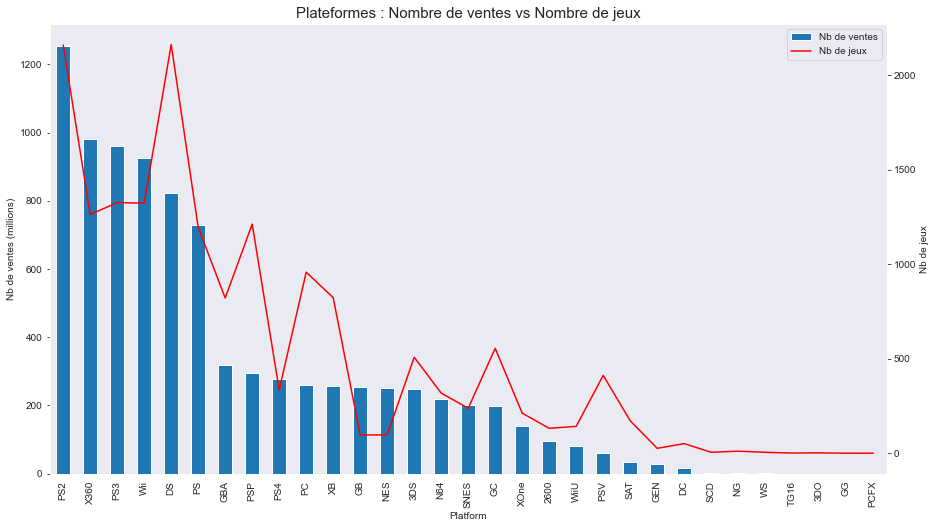

In [14]:
#Création du dataset qui regroupe les plateformes, 
#aggrégées par la somme des ventes des jeux uniques de cette plateforme,
#ordonné par le nombre de ventes du plus important au moins important
df_platform = df.groupby('Platform').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

#Visualisation de ce dataset de classement du nb de vente par plateforme
df_platform.plot.bar(
    x='Platform',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

#Visualisation du nb de jeux par plateforme pour le mettre en rapport du dataset précédent
df_platform.plot(
    x='Platform',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')


plt.title('Plateformes : Nombre de ventes vs Nombre de jeux', fontsize=15);

### 6- Les genres qui font le plus de ventes sont ceux pour lesquels il y a le plus de jeux

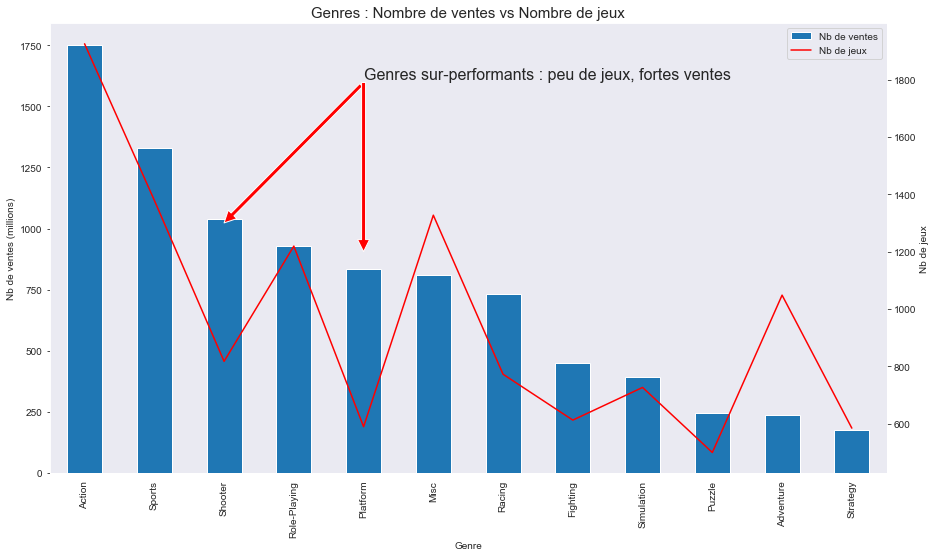

In [15]:
#Création du dataset qui regroupe les genres de jeux, 
#aggrégées par la somme des ventes des jeux uniques de ce genre,
#ordonné par le nombre de ventes du plus important au moins important

df_genre = df.groupby('Genre').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

#Visualisation de ce dataset de classement du nb de vente par genre de jeu
df_genre.plot.bar(
    x='Genre',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

#Visualisation du nb de jeux par genre pour le mettre en rapport du dataset précédent
df_genre.plot(
    x='Genre',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')


plt.annotate('Genres sur-performants : peu de jeux, fortes ventes', xy=(2, 1300), xytext=(4, 1800), fontsize = 16,
            arrowprops={'facecolor':'red'} )
plt.annotate('', xy=(4, 1200), xytext=(4, 1790),
            arrowprops={'facecolor':'red'} )


plt.title('Genres : Nombre de ventes vs Nombre de jeux', fontsize=15);

### 7- Certains genres sont mieux notés que d'autres

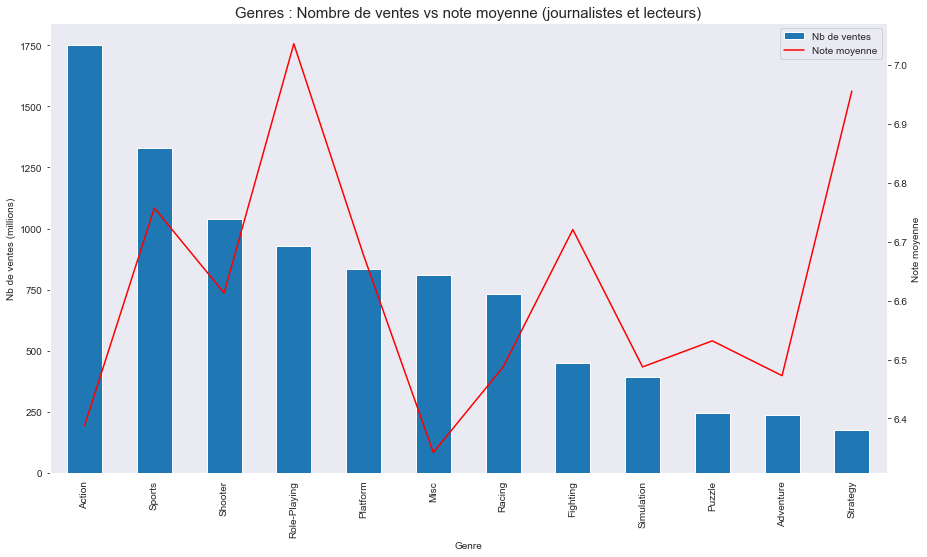

In [16]:
#Création du dataset qui regroupe les genres de jeux, 
#aggrégées par la moyenne des notes journalistes et joueurs de ce genre,
#ordonné par le nombre de ventes du plus important au moins important
df_genre = df.groupby('Genre').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_genre['Score_Rate'] = (df_genre['Score'] + df_genre['Rate']) / 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

#Visualisation de ce dataset de classement du nb de vente par genre de jeu
df_genre.plot.bar(
    x='Genre',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

#Visualisation de la moyenne des notes journalistes et joueurs de chaque genre pour le mettre en rapport du dataset précédent
df_genre.plot(
    x='Genre',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label = 'Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')

plt.title('Genres : Nombre de ventes vs note moyenne (journalistes et lecteurs)', fontsize=15);

### 8- Plusieurs variables numériques sont correlées

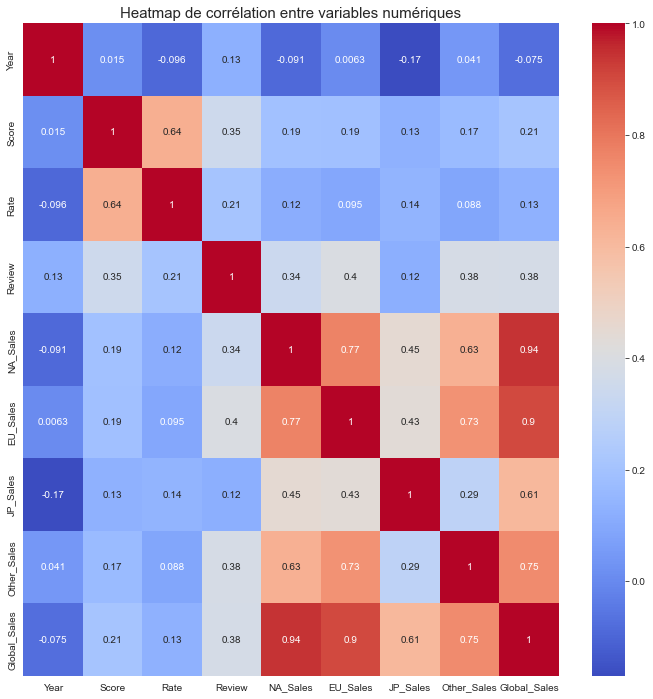

In [17]:
#Création et visualisation de la matrice de corrélation entre les variables numériques du dataset
cor = df.corr()

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(
    cor, 
    annot=True,
    ax=ax, 
    cmap='coolwarm'
)
plt.title('Heatmap de corrélation entre variables numériques', fontsize=15);

### 9- Les ventes sont corrélées aux notes des journalistes

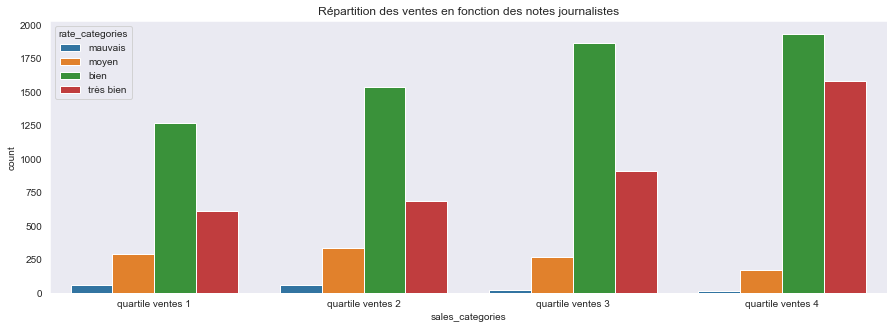

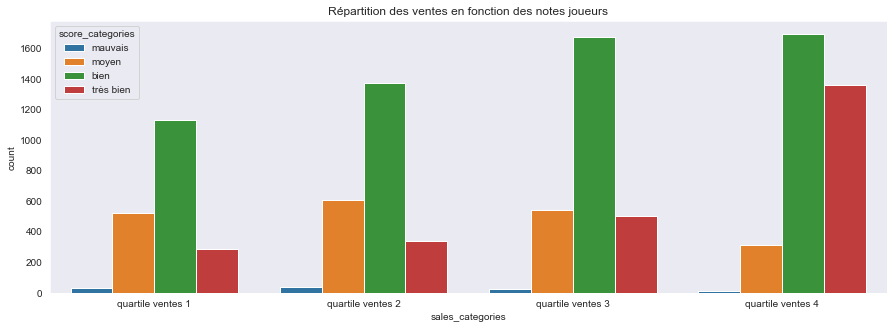

In [19]:
#Création de catégories de ventes en fonction des quartiles
df["sales_categories"]=pd.qcut(df["Global_Sales"],q=[0,0.25,0.5,0.75,1], labels = ["quartile ventes 1", "quartile ventes 2", "quartile ventes 3","quartile ventes 4"])

#Création de catégories de notes journalistes (rate) et de notes joueurs (score)
df["rate_categories"]=pd.cut(df["Rate"], bins = [0, 2.5, 5, 7.5, 10], labels = ["mauvais", "moyen", "bien", "très bien"])
df["score_categories"]=pd.cut(df["Score"], bins = [0, 2.5, 5, 7.5, 10], labels = ["mauvais", "moyen", "bien", "très bien"])

#Création d'un graphique en barres mettant en relation les catégories de ventes et les notes journalistes
plt.subplots(figsize=(15,5))
sns.countplot(df["sales_categories"],hue=df["rate_categories"])
plt.title("Répartition des ventes en fonction des notes journalistes")

#Création d'un graphique en barres mettant en relation les catégories de ventes et les notes joueurs
plt.figure(figsize=(15,5))
sns.countplot(df["sales_categories"],hue=df["score_categories"])
plt.title("Répartition des ventes en fonction des notes joueurs");

### 10- Les jeux les plus vendus font partie d'une licence

/Users/jan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


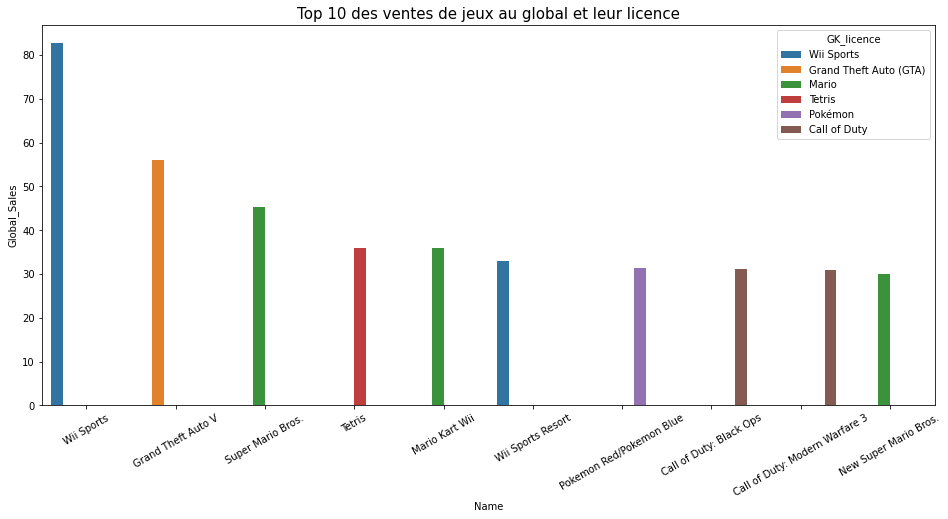

In [20]:
#Nettoyage de certains noms de Licence
df=df.replace(["Wii Sports ","PokǸmon "],["Wii Sports","Pokémon"])

#Groupby pour ramener la somme des ventes par jeu et par licence
sales_licence=df.groupby("Name").agg({"Global_Sales":sum,"GK_licence":"first"}).reset_index().sort_values("Global_Sales",ascending=False).head(10)

#Création d'un graphique en bar pour voir si le top 10 des jeux est rattaché à une licence
plt.figure(figsize=(16,7))
sns.barplot(sales_licence["Name"],sales_licence["Global_Sales"],hue=sales_licence["GK_licence"])
plt.xticks(rotation=30)
plt.title("Top 10 des ventes de jeux au global et leur licence",fontsize=15);

### 11- Les jeux qui comptabilisent le plus de ventes ont été lancés par les meilleurs studios

In [90]:
#Remplacement des valeurs contenant "Ubisoft" pour que les différents noms des filliles soient identifiés sous le même groupe 
for studio in df["Studio"]:
    if "Ubisoft" in str(studio):
        df=df.replace(to_replace=studio,value="Ubisoft")

#Uniformisation des valeurs abrégées et non abrégées de "Electronic Arts" sous l'abréviation "EA"
for studio in df["Studio"]:
    if "EA" in str(studio):
        df=df.replace(to_replace=studio,value="EA")
    elif "Electronic Arts" in str(studio):
        df=df.replace(to_replace=studio,value="EA")

In [91]:
#Groupby sur les ventes globales par studio
top_studio=df.groupby("Studio").agg({"Global_Sales":sum}).reset_index().sort_values(by="Global_Sales",ascending=False)

#Selection du top 20
top_studio=top_studio.head(20)

In [92]:
liste_top=top_studio["Studio"]

#Création d'une chaine de caratères avec tous les noms du top 20 studios séparés par des pipes
chaine = '|'.join(liste_top.values)
r=re.compile(chaine)

#Création d'une liste vide
masked=[]

#Boucle qui parcourt tous les noms des studios présent dans df et qui va enrichir la liste précédemment créé
#par 1 si le studio match avec un des studios top 20 et 0 sinon
for studio in df["Studio"]:
    if r.match(str(studio)):
        masked.append(1)
    else:
        masked.append(0)

#Création de la nouvelle colonne is_top_studio
df["is_top_studio"]=masked

/Users/jan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


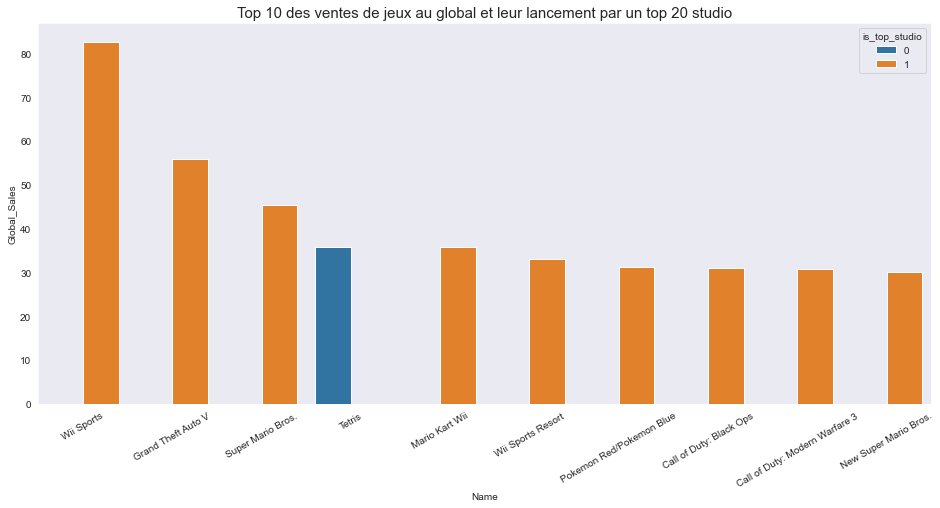

In [107]:
#Groupby qui va regrouper les ventes par jeu avec leur valeur d'appartenance à un top studio
sales_top_studio=df.groupby("Name").agg({"Global_Sales":sum,"is_top_studio":"first"}).reset_index().sort_values("Global_Sales",ascending=False).head(10)

#Création d'un graphique en barres qui affichent le top 10 des jeux et leur appartenance ou non à un top 20 studio
plt.figure(figsize=(16,7))
sns.barplot(sales_top_studio["Name"],sales_top_studio["Global_Sales"],hue=sales_top_studio["is_top_studio"])
plt.xticks(rotation=30)
plt.title("Top 10 des ventes de jeux au global et leur lancement par un top 20 studio",fontsize=15);

### 12- Les éditeurs qui font le plus de ventes produisent le plus de jeux

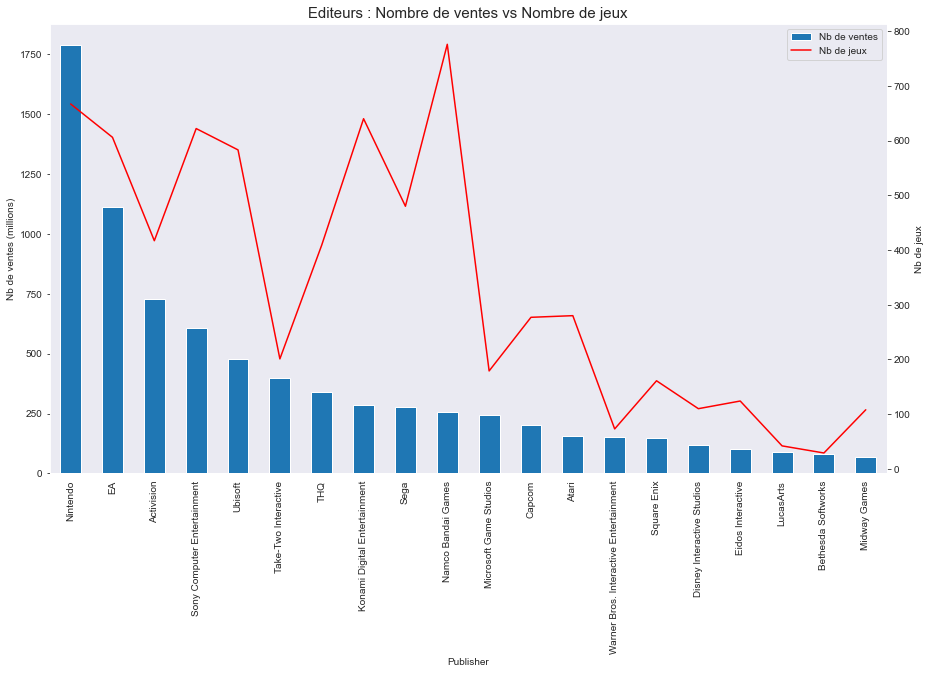

In [117]:
#Création du dataset qui regroupe les éditeurs, 
#aggrégées par la somme des ventes des jeux de cet éditeur,
#ordonné par le nombre de ventes du plus important au moins important

df_publisher = df.groupby('Publisher').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

#Visualisation de ce dataset de classement du nb de vente par éditeur
df_publisher.head(20).plot.bar(
    x='Publisher',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

#Visualisation du nb de jeux par éditeur pour le mettre en rapport du dataset précédent
df_publisher.head(20).plot(
    x='Publisher',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')

plt.title('Editeurs : Nombre de ventes vs Nombre de jeux', fontsize=15);

### 13- Les éditeurs avec le plus de ventes sont ceux dont les jeux ont les meilleurs notes moyennes

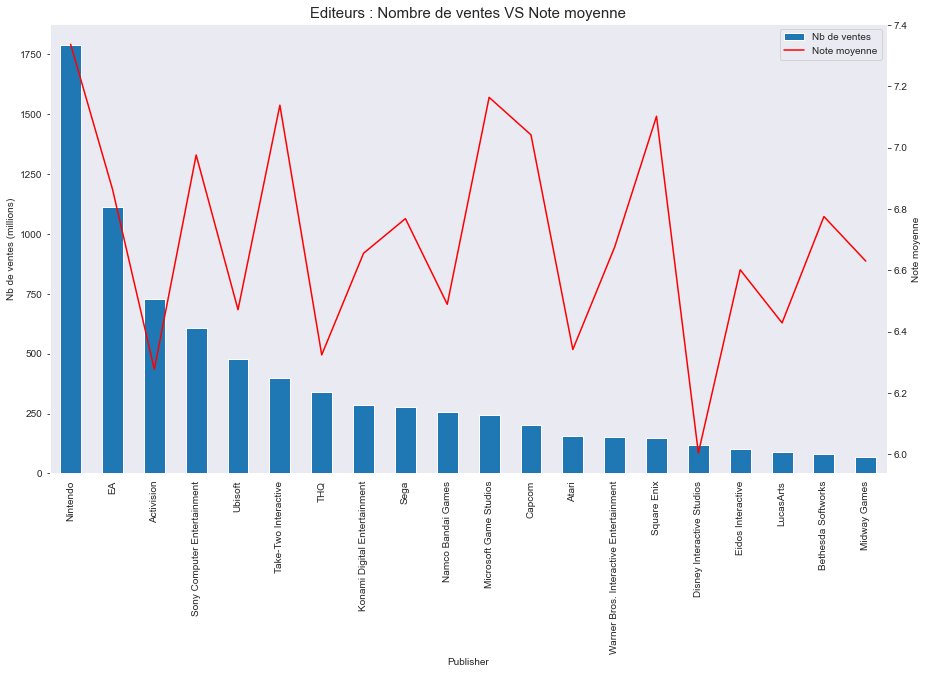

In [118]:
#Création du dataset qui regroupe les éditeurs, 
#aggrégées par la moyenne des notes journalistes et joueurs de ce genre,
#ordonné par le nombre de ventes du plus important au moins important
df_publisher = df.groupby('Publisher').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_publisher['Score_Rate'] = (df_publisher['Score'] + df_publisher['Rate']) / 2
df_publisher.sort_values(by=[])

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

#Visualisation de ce dataset de classement des ventes par éditeur
df_publisher.head(20).plot.bar(
    x='Publisher',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

#Visualisation de la moyenne des notes journalistes et joueurs de chaque éditeur pour le mettre en rapport du dataset précédent
df_publisher.head(20).plot(
    x='Publisher',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')

plt.title('Editeurs : Nombre de ventes VS Note moyenne', fontsize=15);

### 14- Les studios qui font le plus de ventes lancent le plus de jeux

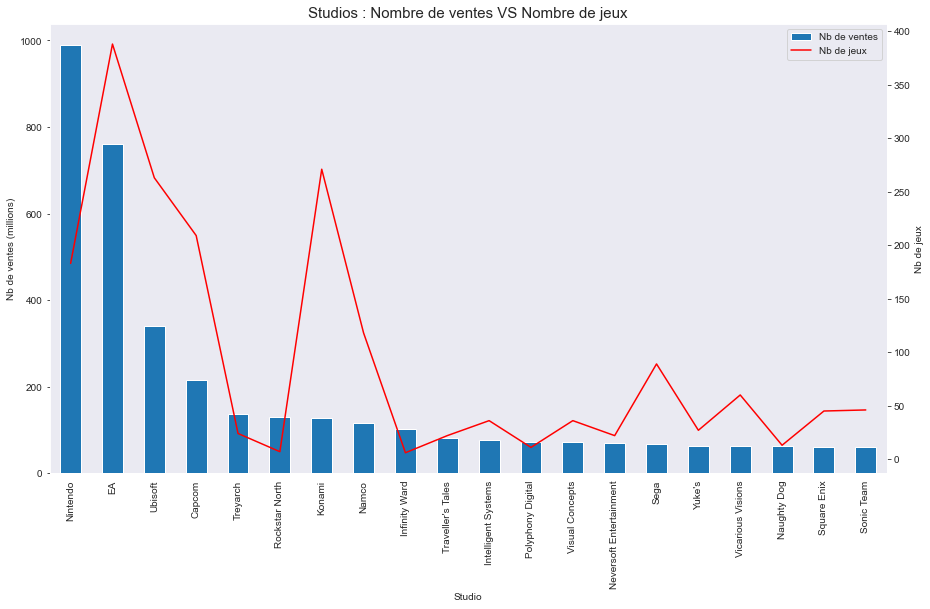

In [120]:
#Création du dataset qui regroupe les studios, 
#aggrégées par la somme des ventes des jeux de ce studio,
#ordonné par le nombre de ventes du plus important au moins important
df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

#Visualisation de ce dataset de classement du nb de vente par studio
df_studio.head(20).plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

#Visualisation du nb de jeux par éditeur pour le mettre en rapport du dataset précédent
df_studio.head(20).plot(
    x='Studio',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')

plt.title('Studios : Nombre de ventes VS Nombre de jeux', fontsize=15);

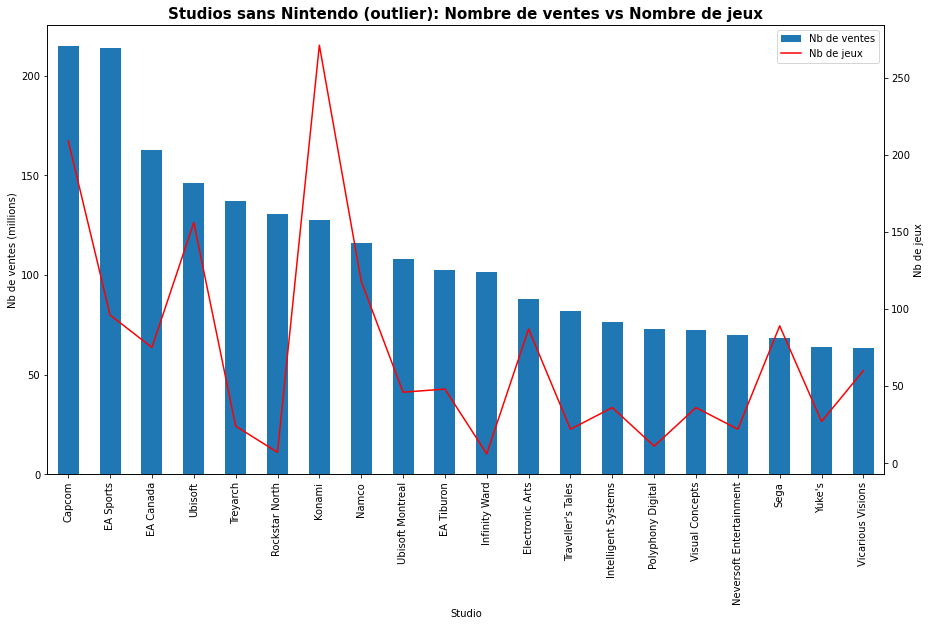

In [7]:
#Même chose sans le studio Nintendo

df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_studio.iloc[1:21,:].plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_studio.iloc[1:21,:].plot(
    x='Studio',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')

plt.title('Studios sans Nintendo (outlier): Nombre de ventes vs Nombre de jeux', weight='bold', fontsize=15);

### 15- Les studios avec le plus de ventes sont ceux dont les jeux ont les meilleurs notes moyennes

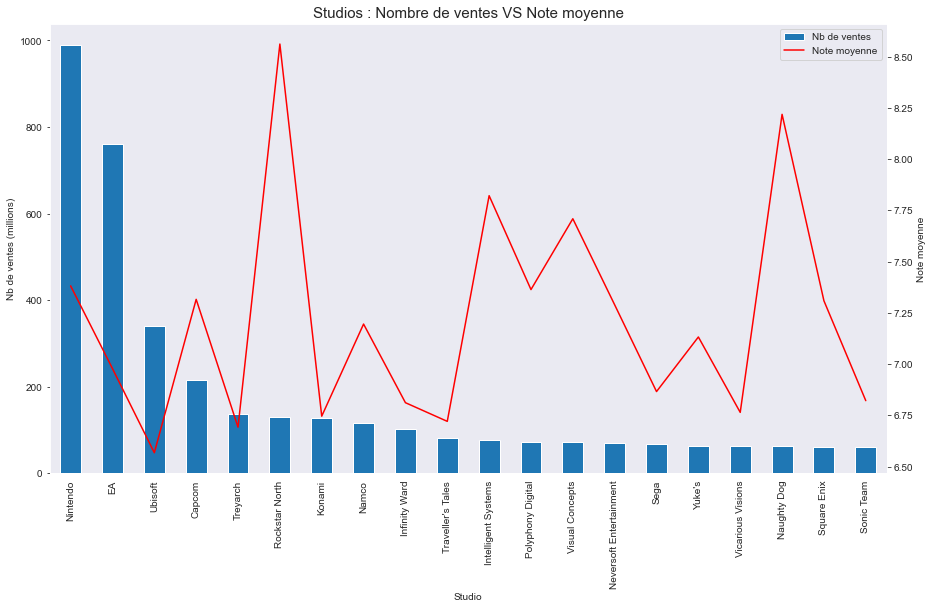

In [121]:
#Création du dataset qui regroupe les studios, 
#aggrégées par la moyenne des notes journalistes et joueurs de ce genre,
#ordonné par le nombre de ventes du plus important au moins important
df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_studio['Score_Rate'] = (df_studio['Score'] + df_studio['Rate']) / 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

#Visualisation de ce dataset de classement des ventes par studio
df_studio.head(20).plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

#Visualisation de la moyenne des notes journalistes et joueurs de chaque éditeur pour le mettre en rapport du dataset précédent
df_studio.head(20).plot(
    x='Studio',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

plt.legend(lines, labels,           
           loc = 'upper right')

plt.title('Studios : Nombre de ventes VS Note moyenne', fontsize=15);

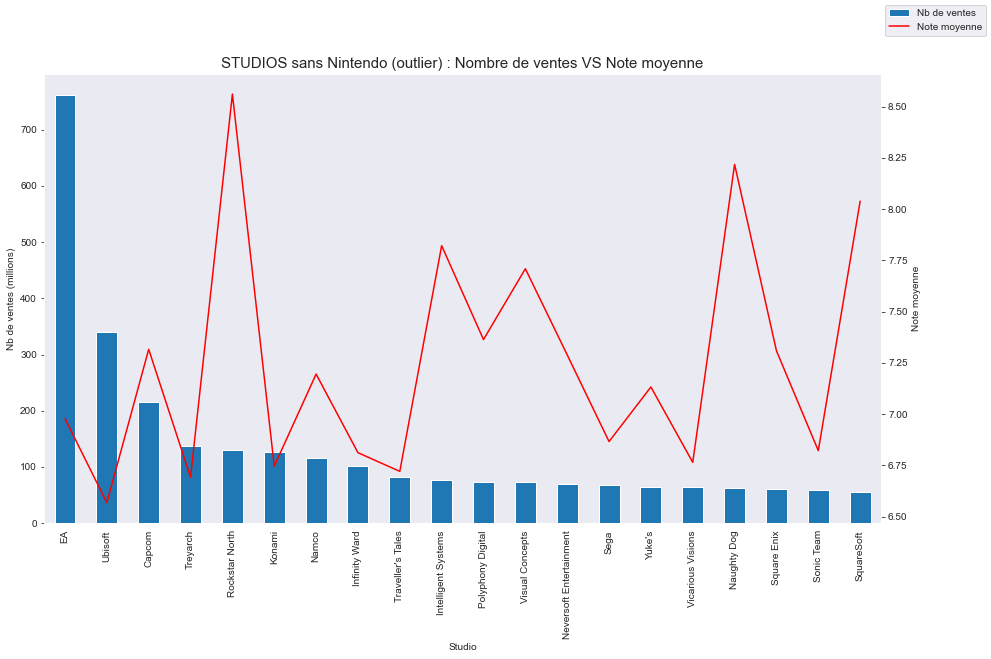

In [115]:
#Même chose sans le studio Nintendo

df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_studio['Score_Rate'] = (df_studio['Score'] + df_studio['Rate']) / 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_studio.iloc[1:21,:].plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_studio.iloc[1:21,:].plot(
    x='Studio',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('STUDIOS sans Nintendo (outlier) : Nombre de ventes VS Note moyenne', fontsize=15);